In [1]:
# Used for plotting data
%matplotlib inline
import matplotlib.pyplot as plt

# Used for data storage and manipulation 
import numpy as np
import pandas as pd

# Used for Regression Modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Used for Acc metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# For stepwise regression
import statsmodels.api as sm

# box plots
import seaborn as sns
# pairplot
from seaborn import pairplot
# Correlation plot
from statsmodels.graphics.correlation import plot_corr

In [4]:
data = pd.read_excel("climatechangedata.xlsx")

In [5]:
# adding .head() to your dataset allows you to see the first rows in the dataset. 
# Add a # inside the brackets to specificy how many rows are returned or else 5 rows are returned.
print(data.shape)
# (12144, 18)
data.head()

(141, 8)


,Year,adjusted_sea_level(in),world_population,global_surface_temp_anomaly(celsius),antarctica_ice_mass_change,greenland_ice_mass_change,global_co2(in billion metric tons),global_seasurface_temp_anomaly(celsius)
0,2020,9.737462,7.794799e+09,1.57,-2701.780000,-4766.340000,34.81,0.840
1,2019,9.479331,7.713468e+09,1.41,-2365.490000,-3651.033610,36.70,0.876
2,2018,9.221200,7.631091e+09,1.20,-2256.760000,-3519.216944,36.65,0.732
3,2017,9.087686,7.547859e+09,1.40,-2172.783512,-3435.395506,35.93,0.822
4,2016,9.036237,7.464022e+09,1.53,-2105.760447,-3200.426290,35.45,0.930


In [6]:
# check for the null values in each column
data.isna().sum()

Year                                         0
adjusted_sea_level(in)                       0
world_population                            71
global_surface_temp_anomaly(celsius)         0
antarctica_ice_mass_change                 112
greenland_ice_mass_change                  112
global_co2(in billion metric tons)         112
global_seasurface_temp_anomaly(celsius)      0
dtype: int64

In [7]:
# Gives you useful info about your data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     141 non-null    int64  
 1   adjusted_sea_level(in)                   141 non-null    float64
 2   world_population                         70 non-null     float64
 3   global_surface_temp_anomaly(celsius)     141 non-null    float64
 4   antarctica_ice_mass_change               29 non-null     float64
 5   greenland_ice_mass_change                29 non-null     float64
 6   global_co2(in billion metric tons)       29 non-null     float64
 7   global_seasurface_temp_anomaly(celsius)  141 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 8.9 KB


In [8]:
# Gives you summary statistics on your numeric columns
data.describe()

,Year,adjusted_sea_level(in),world_population,global_surface_temp_anomaly(celsius),antarctica_ice_mass_change,greenland_ice_mass_change,global_co2(in billion metric tons),global_seasurface_temp_anomaly(celsius)
count,141.000000,141.000000,7.000000e+01,141.000000,29.000000,29.000000,29.000000,141.000000
mean,1950.000000,3.919751,5.002010e+09,0.087730,-658.584514,-1196.428684,29.850345,-0.300383
std,40.847277,2.697811,1.594877e+09,0.536751,973.461574,1563.086338,5.100117,0.487778
min,1880.000000,-0.440945,2.584034e+09,-0.720000,-2701.780000,-4766.340000,22.570000,-1.176000
25%,1915.000000,1.791339,3.570120e+09,-0.310000,-1319.484688,-2561.055333,24.520000,-0.690000
50%,1950.000000,3.598425,4.915745e+09,-0.040000,-226.623443,-633.429964,30.580000,-0.402000
75%,1985.000000,5.980315,6.361332e+09,0.340000,122.156204,139.036381,34.970000,0.048000
max,2020.000000,9.737462,7.794799e+09,1.570000,430.282061,461.673859,36.700000,0.930000


In [9]:
# return only rows where the year is greater than 1992
current = data[(data['Year'] > 1992)]

In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

In [11]:
print(current.shape)

(28, 8)


In [12]:
final = data.dropna()

In [13]:
print(final.shape)

(29, 8)


In [14]:
final.tail()

,Year,adjusted_sea_level(in),world_population,global_surface_temp_anomaly(celsius),antarctica_ice_mass_change,greenland_ice_mass_change,global_co2(in billion metric tons),global_seasurface_temp_anomaly(celsius)
24,1996,6.783465,5.824892e+09,0.35,205.674407,157.888961,24.15,0.084
25,1995,6.622047,5.744213e+09,0.78,242.839127,301.790526,23.45,0.174
26,1994,6.507874,5.663150e+09,0.48,371.881452,386.065526,22.96,0.084
27,1993,6.303150,5.581598e+09,0.35,430.282061,461.673859,22.80,0.048
28,1992,6.374016,5.498920e+09,0.25,418.310350,395.365526,22.57,0.048


In [15]:
final.head()

,Year,adjusted_sea_level(in),world_population,global_surface_temp_anomaly(celsius),antarctica_ice_mass_change,greenland_ice_mass_change,global_co2(in billion metric tons),global_seasurface_temp_anomaly(celsius)
0,2020,9.737462,7.794799e+09,1.57,-2701.780000,-4766.340000,34.81,0.840
1,2019,9.479331,7.713468e+09,1.41,-2365.490000,-3651.033610,36.70,0.876
2,2018,9.221200,7.631091e+09,1.20,-2256.760000,-3519.216944,36.65,0.732
3,2017,9.087686,7.547859e+09,1.40,-2172.783512,-3435.395506,35.93,0.822
4,2016,9.036237,7.464022e+09,1.53,-2105.760447,-3200.426290,35.45,0.930


In [16]:
data.tail()

,Year,adjusted_sea_level(in),world_population,global_surface_temp_anomaly(celsius),antarctica_ice_mass_change,greenland_ice_mass_change,global_co2(in billion metric tons),global_seasurface_temp_anomaly(celsius)
136,1884,0.590551,NaN,-0.72,NaN,NaN,NaN,-0.582
137,1883,-0.232283,NaN,-0.67,NaN,NaN,NaN,-0.456
138,1882,-0.440945,NaN,-0.47,NaN,NaN,NaN,-0.348
139,1881,0.220472,NaN,-0.44,NaN,NaN,NaN,-0.330
140,1880,0.000000,NaN,-0.52,NaN,NaN,NaN,-0.420


In [17]:
df = final[['Year', 'adjusted_sea_level(in)', 'world_population', 'global_surface_temp_anomaly(celsius)', 'antarctica_ice_mass_change', 'greenland_ice_mass_change', 'global_co2(in billion metric tons)', 'global_seasurface_temp_anomaly(celsius)']]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     29 non-null     int64  
 1   adjusted_sea_level(in)                   29 non-null     float64
 2   world_population                         29 non-null     float64
 3   global_surface_temp_anomaly(celsius)     29 non-null     float64
 4   antarctica_ice_mass_change               29 non-null     float64
 5   greenland_ice_mass_change                29 non-null     float64
 6   global_co2(in billion metric tons)       29 non-null     float64
 7   global_seasurface_temp_anomaly(celsius)  29 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 2.0 KB


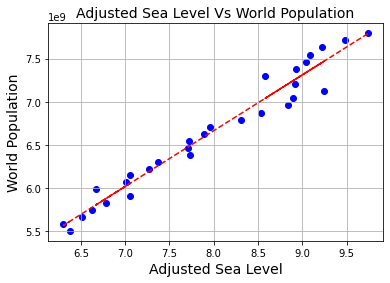

In [19]:
### Plot data
plt.scatter(df['adjusted_sea_level(in)'], df['world_population'], color='blue')
plt.title('Adjusted Sea Level Vs World Population', fontsize=14)
plt.xlabel('Adjusted Sea Level', fontsize=14)
plt.ylabel('World Population', fontsize=14)
plt.grid(True)

### Add trendline
z= np.polyfit(df['adjusted_sea_level(in)'], df['world_population'], 1)
p=np.poly1d(z)
plt.plot(df['adjusted_sea_level(in)'], p(df['adjusted_sea_level(in)']), "r--")

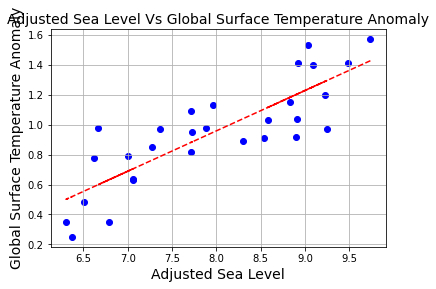

In [20]:
plt.scatter(df['adjusted_sea_level(in)'], df['global_surface_temp_anomaly(celsius)'], color='blue')
plt.title('Adjusted Sea Level Vs Global Surface Temperature Anomaly', fontsize=14)
plt.xlabel('Adjusted Sea Level', fontsize=14)
plt.ylabel('Global Surface Temperature Anomaly', fontsize=14)
plt.grid(True)

### Add trendline
z= np.polyfit(df['adjusted_sea_level(in)'], df['global_surface_temp_anomaly(celsius)'], 1)
p=np.poly1d(z)
plt.plot(df['adjusted_sea_level(in)'], p(df['adjusted_sea_level(in)']), "r--")

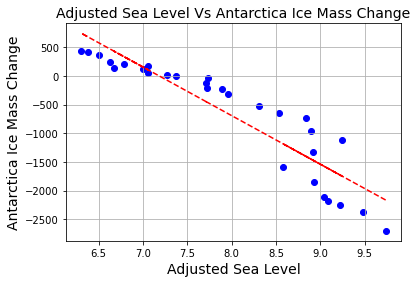

In [21]:
plt.scatter(df['adjusted_sea_level(in)'], df['antarctica_ice_mass_change'], color='blue')
plt.title('Adjusted Sea Level Vs Antarctica Ice Mass Change', fontsize=14)
plt.xlabel('Adjusted Sea Level', fontsize=14)
plt.ylabel('Antarctica Ice Mass Change', fontsize=14)
plt.grid(True)

### Add trendline
z= np.polyfit(df['adjusted_sea_level(in)'], df['antarctica_ice_mass_change'], 1)
p=np.poly1d(z)
plt.plot(df['adjusted_sea_level(in)'], p(df['adjusted_sea_level(in)']), "r--")

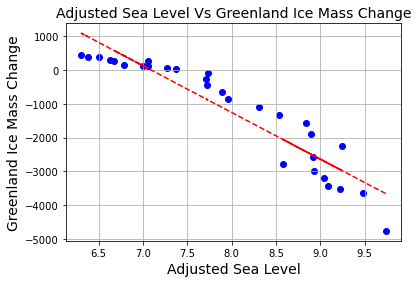

In [22]:
plt.scatter(df['adjusted_sea_level(in)'], df['greenland_ice_mass_change'], color='blue')
plt.title('Adjusted Sea Level Vs Greenland Ice Mass Change', fontsize=14)
plt.xlabel('Adjusted Sea Level', fontsize=14)
plt.ylabel('Greenland Ice Mass Change', fontsize=14)
plt.grid(True)

### Add trendline
z= np.polyfit(df['adjusted_sea_level(in)'], df['greenland_ice_mass_change'], 1)
p=np.poly1d(z)
plt.plot(df['adjusted_sea_level(in)'], p(df['adjusted_sea_level(in)']), "r--")

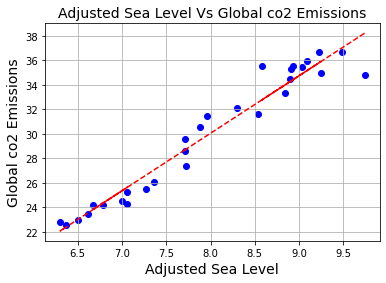

In [23]:
plt.scatter(df['adjusted_sea_level(in)'], df['global_co2(in billion metric tons)'], color='blue')
plt.title('Adjusted Sea Level Vs Global co2 Emissions', fontsize=14)
plt.xlabel('Adjusted Sea Level', fontsize=14)
plt.ylabel('Global co2 Emissions', fontsize=14)
plt.grid(True)

### Add trendline
z= np.polyfit(df['adjusted_sea_level(in)'], df['global_co2(in billion metric tons)'], 1)
p=np.poly1d(z)
plt.plot(df['adjusted_sea_level(in)'], p(df['adjusted_sea_level(in)']), "r--")

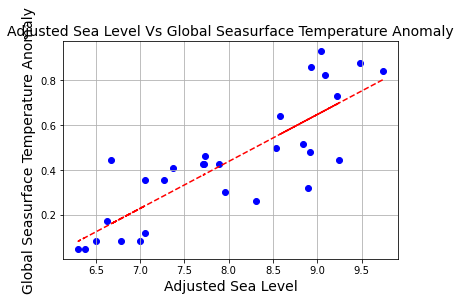

In [24]:
plt.scatter(df['adjusted_sea_level(in)'], df['global_seasurface_temp_anomaly(celsius)'], color='blue')
plt.title('Adjusted Sea Level Vs Global Seasurface Temperature Anomaly', fontsize=14)
plt.xlabel('Adjusted Sea Level', fontsize=14)
plt.ylabel('Global Seasurface Temperature Anomaly', fontsize=14)
plt.grid(True)

### Add trendline
z= np.polyfit(df['adjusted_sea_level(in)'], df['global_seasurface_temp_anomaly(celsius)'], 1)
p=np.poly1d(z)
plt.plot(df['adjusted_sea_level(in)'], p(df['adjusted_sea_level(in)']), "r--")



In [25]:
corr = df.corr()
corr

,Year,adjusted_sea_level(in),world_population,global_surface_temp_anomaly(celsius),antarctica_ice_mass_change,greenland_ice_mass_change,global_co2(in billion metric tons),global_seasurface_temp_anomaly(celsius)
Year,1.000000,0.981313,0.999921,0.885671,-0.951895,-0.955437,0.976646,0.880996
adjusted_sea_level(in),0.981313,1.000000,0.980678,0.837244,-0.917731,-0.935207,0.973628,0.830638
world_population,0.999921,0.980678,1.000000,0.885213,-0.955573,-0.958716,0.975860,0.882784
global_surface_temp_anomaly(celsius),0.885671,0.837244,0.885213,1.000000,-0.843224,-0.823278,0.817295,0.914998
antarctica_ice_mass_change,-0.951895,-0.917731,-0.955573,-0.843224,1.000000,0.992832,-0.906721,-0.893282
greenland_ice_mass_change,-0.955437,-0.935207,-0.958716,-0.823278,0.992832,1.000000,-0.922752,-0.861771
global_co2(in billion metric tons),0.976646,0.973628,0.975860,0.817295,-0.906721,-0.922752,1.000000,0.815854
global_seasurface_temp_anomaly(celsius),0.880996,0.830638,0.882784,0.914998,-0.893282,-0.861771,0.815854,1.000000


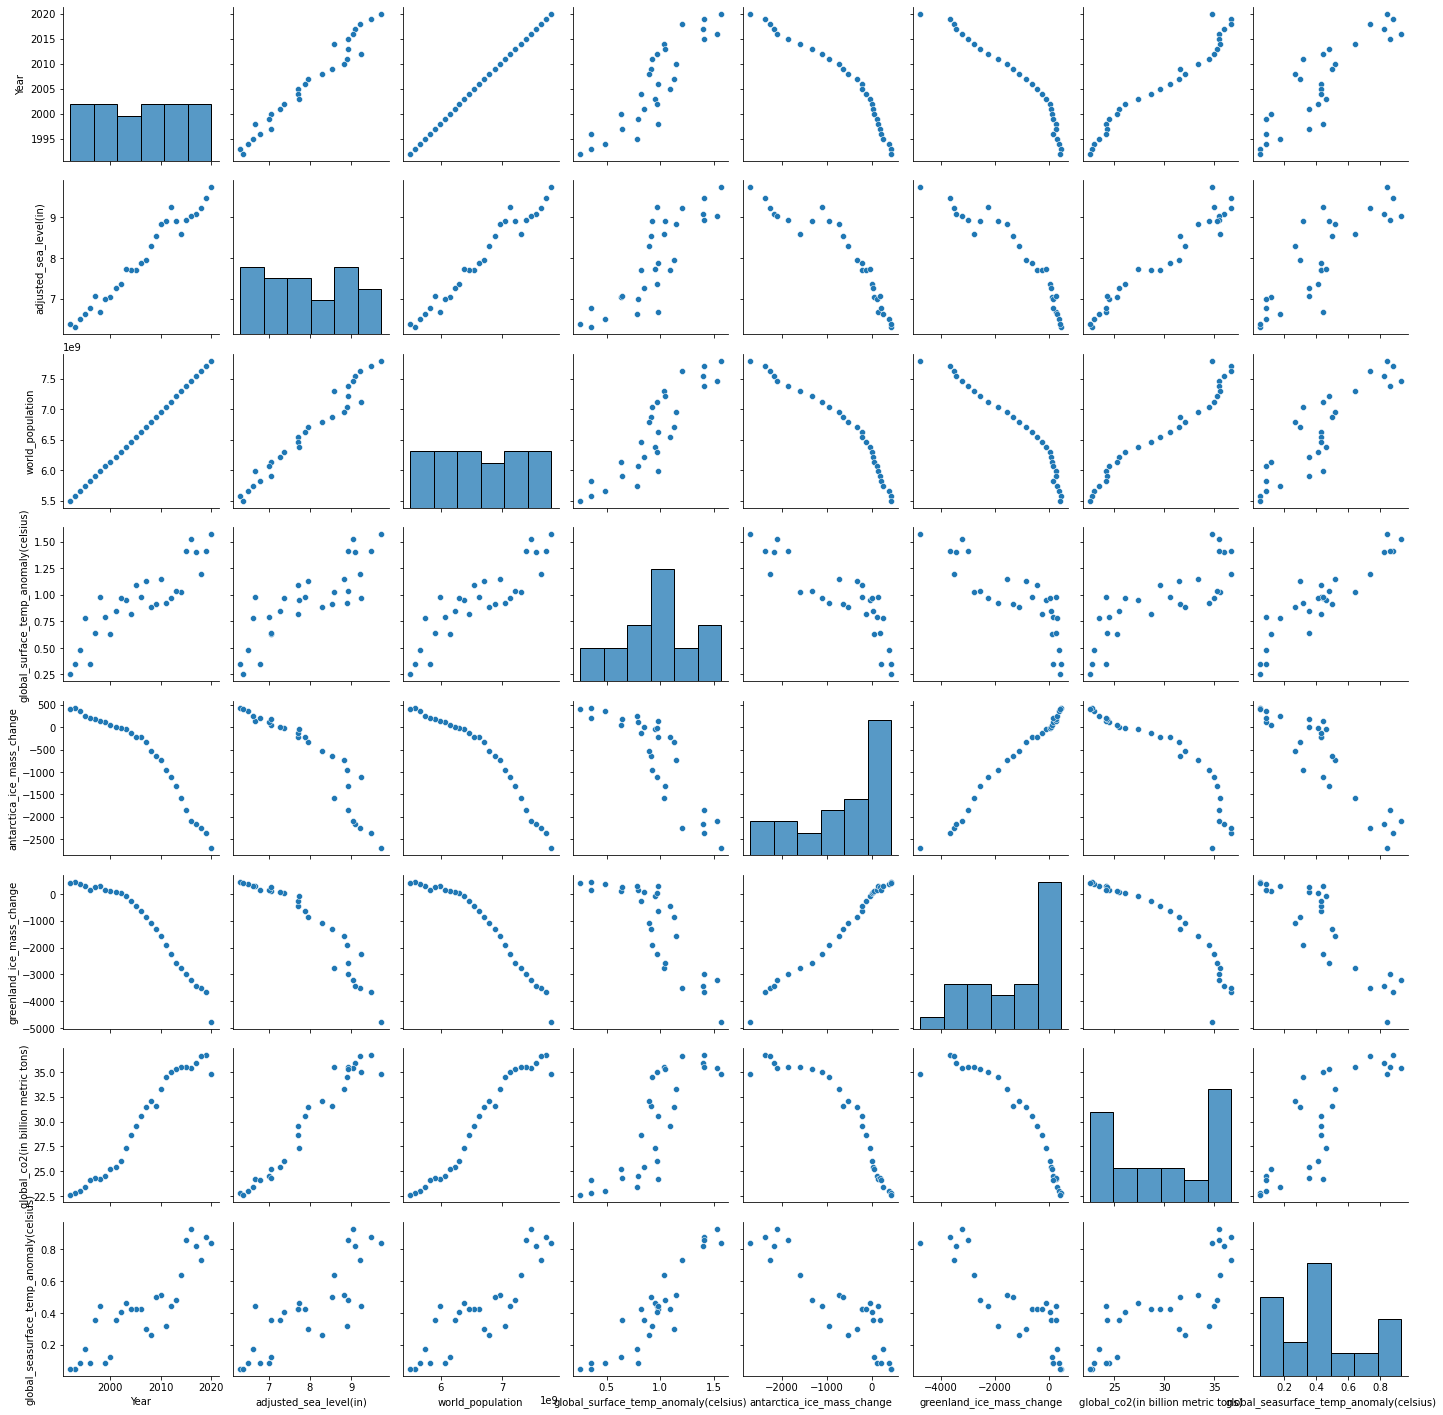

In [26]:
# More optional EDA
pairplot(df)

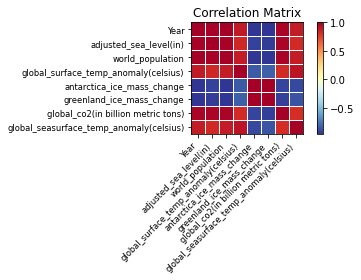

In [27]:
# More optional EDA
fig= plot_corr(corr,xnames=corr.columns)

In [28]:
X = pd.DataFrame(df, columns = ['world_population', 'global_surface_temp_anomaly(celsius)', 'antarctica_ice_mass_change', 'greenland_ice_mass_change', 'global_co2(in billion metric tons)', 'global_seasurface_temp_anomaly(celsius)'])
y = pd.DataFrame(df, columns=['adjusted_sea_level(in)'])

# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

    world_population  global_surface_temp_anomaly(celsius)  \
23      5.905046e+09                                  0.64   

    antarctica_ice_mass_change  greenland_ice_mass_change  \
23                  176.892977                 262.886284   

    global_co2(in billion metric tons)  \
23                                24.3   

    global_seasurface_temp_anomaly(celsius)  
23                                    0.354  
    world_population  global_surface_temp_anomaly(celsius)  \
14      6.623518e+09                                  0.98   

    antarctica_ice_mass_change  greenland_ice_mass_change  \
14                 -226.623443                -633.429964   

    global_co2(in billion metric tons)  \
14                               30.58   

    global_seasurface_temp_anomaly(celsius)  
14                                    0.426  
    adjusted_sea_level(in)
23                7.059055
    adjusted_sea_level(in)
14                7.885827


In [29]:
# Create linear regression model
lm1 = LinearRegression()

# Fit linear regression
lm1.fit(X_train, y_train)

# Make prediction on the testing data
pred = lm1.predict(X_test)

In [30]:
# Get the slope and intercept of the line best fit.
print(lm1.intercept_)


print(lm1.coef_)

[-4.97303152]
[[ 2.13875300e-09 -5.18066447e-01  1.10013233e-03 -5.22487277e-04
  -2.72282974e-02  3.25414498e-01]]


In [31]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)
# The closer towards 1, the better the fit
print(test_set_r2)

0.13886441411816552
0.9723386151505964


In [32]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['adjusted_sea_level(in)']) - abs(df_results['Predicted'])
print(df_results)

    adjusted_sea_level(in)  Predicted  Residuals
14                7.885827   8.072961  -0.187134
21                7.003937   7.009046  -0.005109
18                7.366142   7.404852  -0.038711
20                7.055118   7.180467  -0.125349
25                6.622047   6.435921   0.186126
19                7.271654   7.294181  -0.022528
3                 9.087686   9.138460  -0.050774
10                8.834646   8.581106   0.253540


In [33]:
### revamped model with Greenland, Co2, Surface temp ###
X = pd.DataFrame(df, columns = ['global_surface_temp_anomaly(celsius)', 'greenland_ice_mass_change', 'global_co2(in billion metric tons)'])
y = pd.DataFrame(df, columns=['adjusted_sea_level(in)'])


In [34]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

    global_surface_temp_anomaly(celsius)  greenland_ice_mass_change  \
23                                  0.64                 262.886284   

    global_co2(in billion metric tons)  
23                                24.3  
    global_surface_temp_anomaly(celsius)  greenland_ice_mass_change  \
14                                  0.98                -633.429964   

    global_co2(in billion metric tons)  
14                               30.58  
    adjusted_sea_level(in)
23                7.059055
    adjusted_sea_level(in)
14                7.885827


In [35]:
# Create linear regression model
lm2 = LinearRegression()

# Fit linear regression
lm2.fit(X_train, y_train)

# Make prediction on the testing data
pred = lm2.predict(X_test)

In [36]:
# Get the slope and intercept of the line best fit.
print(lm2.intercept_)

[3.24103213]


In [37]:
print(lm2.coef_)

[[ 1.80675921e-01 -1.76801539e-04  1.44696647e-01]]


In [38]:
# Calculate the Root Mean Square Error between the actual & predicted
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

# Calculate the R^2 or coefficent of determination between the actual & predicted
test_set_r2 = r2_score(y_test, pred)

# Note that for rmse, the lower that value is, the better the fit
print(test_set_rmse)
# The closer towards 1, the better the fit
print(test_set_r2)

0.17092963576441636
0.9580891256701187


In [39]:
df_results = y_test
df_results['Predicted'] = pred.ravel()
df_results['Residuals'] = abs(df_results['adjusted_sea_level(in)']) - abs(df_results['Predicted'])
print(df_results)

    adjusted_sea_level(in)  Predicted  Residuals
14                7.885827   7.954909  -0.069083
21                7.003937   6.907146   0.096791
18                7.366142   7.179156   0.186986
20                7.055118   6.985456   0.069662
25                6.622047   6.721739  -0.099691
19                7.271654   7.063598   0.208056
3                 9.087686   9.300312  -0.212626
10                8.834646   8.549440   0.285206


In [49]:
### years from now analysis --- year 2045 ###
Year = 2045

### Co2 ### Equation: Global Co2(In Billion Metric Tons) = 0.58499*Year + -1143.64
CO2_2122 = 0.58499*(Year)+ (-1143.64)
CO2_2122

52.66454999999996

In [50]:
### Greeanland ### Equation: Greenland Ice Mass Change = -175.395*Year + 350645
Greenland_2122 = -175.395*Year + 350645
Greenland_2122

-8037.775000000023

In [51]:
### Surface Temp ### Equation: Global Surface Temp Anomaly(Celsius) = 0.0117089*Year + -22.7447

Surface_2122 = 0.0117089*Year + -22.7447
Surface_2122

1.200000499999998

In [52]:
print(lm2.coef_)
print(lm2.intercept_)

[[ 1.80675921e-01 -1.76801539e-04  1.44696647e-01]]
[3.24103213]


In [54]:
#### Predict 2122 adjusted sea level #### Y = mx1 + mx2 + mx3 + b ### Surface, Greenland, Co2
Adjusted_SeaLevel_2122 = (Surface_2122_coef*Surface_2122) + (Greenland_2122_coef*Greenland_2122) + (Co2_2122_coef*CO2_2122) + intercept
Adjusted_SeaLevel_2122

12.499318116437536

In [55]:
### years from now analysis --- year 2070 ###
Year = 2070

### Co2 ### Equation: Global Co2(In Billion Metric Tons) = 0.58499*Year + -1143.64
CO2_2122 = 0.58499*(Year)+ (-1143.64)
CO2_2122

67.28929999999991

In [56]:
### Greeanland ### Equation: Greenland Ice Mass Change = -175.395*Year + 350645
Greenland_2122 = -175.395*Year + 350645
Greenland_2122

-12422.650000000023

In [57]:
### Surface Temp ### Equation: Global Surface Temp Anomaly(Celsius) = 0.0117089*Year + -22.7447

Surface_2122 = 0.0117089*Year + -22.7447
Surface_2122

1.492722999999998

In [58]:
print(lm2.coef_)
print(lm2.intercept_)

[[ 1.80675921e-01 -1.76801539e-04  1.44696647e-01]]
[3.24103213]


In [59]:
#### Predict 2122 adjusted sea level #### Y = mx1 + mx2 + mx3 + b ### Surface, Greenland, Co2
Adjusted_SeaLevel_2122 = (Surface_2122_coef*Surface_2122) + (Greenland_2122_coef*Greenland_2122) + (Co2_2122_coef*CO2_2122) + intercept
Adjusted_SeaLevel_2122

15.443610960258326

In [60]:
### years from now analysis --- year 2095 ###
Year = 2095

### Co2 ### Equation: Global Co2(In Billion Metric Tons) = 0.58499*Year + -1143.64
CO2_2122 = 0.58499*(Year)+ (-1143.64)
CO2_2122

81.91404999999986

In [61]:
### Greeanland ### Equation: Greenland Ice Mass Change = -175.395*Year + 350645
Greenland_2122 = -175.395*Year + 350645
Greenland_2122

-16807.525000000023

In [62]:
### Surface Temp ### Equation: Global Surface Temp Anomaly(Celsius) = 0.0117089*Year + -22.7447

Surface_2122 = 0.0117089*Year + -22.7447
Surface_2122

1.785445499999998

In [63]:
print(lm2.coef_)
print(lm2.intercept_)

[[ 1.80675921e-01 -1.76801539e-04  1.44696647e-01]]
[3.24103213]


In [64]:
#### Predict 2122 adjusted sea level #### Y = mx1 + mx2 + mx3 + b ### Surface, Greenland, Co2
Adjusted_SeaLevel_2122 = (Surface_2122_coef*Surface_2122) + (Greenland_2122_coef*Greenland_2122) + (Co2_2122_coef*CO2_2122) + intercept
Adjusted_SeaLevel_2122

18.387903804079116